# ***code 1*** - Using Tf.pipeline - WASTE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/data.zip"
extract_to = "/content/Data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Files extracted successfully!")

Files extracted successfully!


In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Data/data",
    shuffle = True,
    image_size = (244,244),
    batch_size = 32
)

Found 305 files belonging to 2 classes.


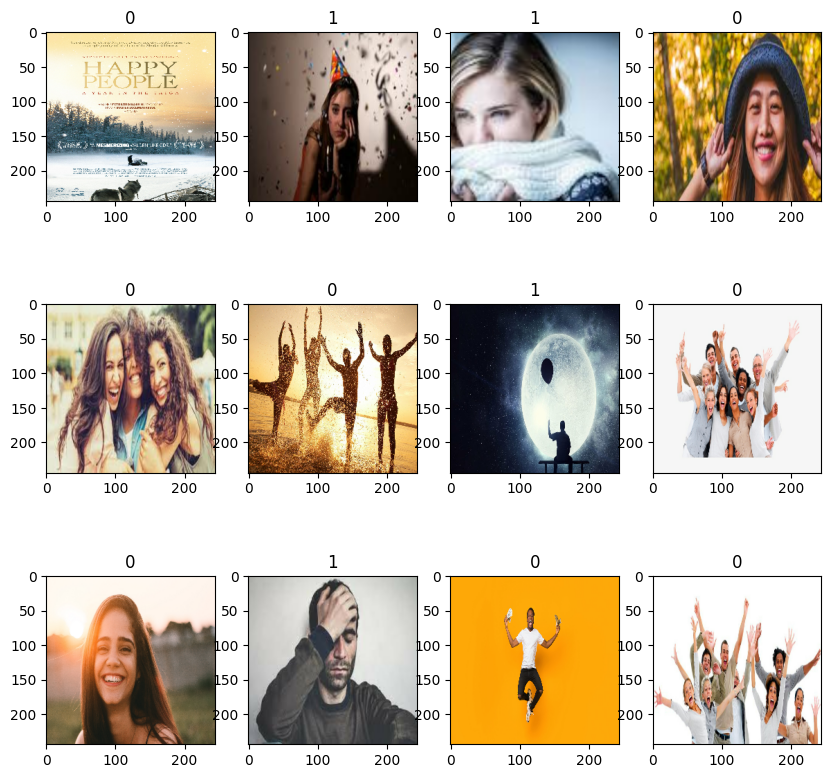

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(label_batch[i].numpy().astype("uint8"))

In [ ]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split=0.1, test_split=.1, shuffle=True, shuffle_size=10000):
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  train_size = int(ds_size * train_split)
  val_size = int(ds_size * val_split)
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(244,244),
    tf.keras.layers.Rescaling(1.0/255),
])

In [ ]:
model = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,

    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(244,244,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
model.fit(train_ds, epochs=50, batch_size=32, validation_data=val_ds)

Epoch 1/50


ValueError: `loss_weights` must match the number of losses, got 1 losses and 2 weights.

In [ ]:
model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8438 - loss: 0.3462


[0.3462474048137665, 0.84375]

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/8iAb9k4aT.jpg')
img = cv2.resize(img, (244, 244))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis=0)
img = img / 255.0
img

array([[[[0.7372549 , 0.58431373, 0.44313725],
         [0.74901961, 0.59215686, 0.45098039],
         [0.74901961, 0.6       , 0.45882353],
         ...,
         [0.46666667, 0.4       , 0.36078431],
         [0.41176471, 0.3372549 , 0.30588235],
         [0.42352941, 0.35294118, 0.31372549]],

        [[0.72156863, 0.56862745, 0.41568627],
         [0.75294118, 0.6       , 0.44705882],
         [0.74901961, 0.59607843, 0.44705882],
         ...,
         [0.45098039, 0.38039216, 0.34117647],
         [0.42745098, 0.36078431, 0.31764706],
         [0.43137255, 0.35686275, 0.32941176]],

        [[0.72941176, 0.57647059, 0.42352941],
         [0.72941176, 0.57647059, 0.42352941],
         [0.7372549 , 0.58039216, 0.43921569],
         ...,
         [0.43137255, 0.35686275, 0.32941176],
         [0.43137255, 0.36078431, 0.32156863],
         [0.45098039, 0.38039216, 0.34117647]],

        ...,

        [[0.4745098 , 0.52156863, 0.61568627],
         [0.46666667, 0.51372549, 0.60784314]

In [ ]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[1.]], dtype=float32)

In [ ]:
pred = model.predict(img)
print(f"Predicted probability: {pred}")
print("Predicted class:", 1 if pred > 0.5 else 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted probability: [[1.]]
Predicted class: 1


In [ ]:
y_predictions = model.predict(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [ ]:
y_true = []
for images, labels in test_ds:
    y_true.extend(labels.numpy())

In [ ]:
for i in range(len(y_predictions)):
    y_predictions[i] = 1 if y_predictions[i] > 0.5 else 0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cr = classification_report(y_true, y_predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.62      0.76        13

    accuracy                           0.84        32
   macro avg       0.90      0.81      0.82        32
weighted avg       0.88      0.84      0.83        32



# ***CODE 2 WASTE***

In [ ]:
import glob
import numpy as np
data_dict = {
    'happy' : list(glob.glob('/content/Data/data/happy/*')),
    'sad' : list(glob.glob('/content/Data/data/sad/*')),
}

In [ ]:
data_label = {
    'happy' : 1,
    'sad' : 0,
}
x, y = [], []
for key, values in data_dict.items():
  for value in values:
    img = cv2.imread(str(value))
    img = cv2.resize(img, (244, 244))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x.append(img)
    y.append(data_label[key])

x = np.array(x)
y = np.array(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train_scaled = x_train / 255
x_test_scaled = x_test / 255
import pandas as pd




In [ ]:
df = pd.DataFrame(data=x)
df['label'] = y

In [ ]:
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,178599,178600,178601,178602,178603,178604,178605,178606,178607,label
300,247,249,248,247,249,248,247,249,248,247,...,37,37,37,4,4,4,11,11,11,0
301,169,170,165,172,173,168,170,171,166,171,...,50,51,55,49,50,54,51,52,56,0
302,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
303,255,255,255,255,255,255,255,255,255,255,...,20,18,39,20,18,39,20,18,39,0
304,5,44,60,14,53,68,27,65,77,38,...,114,126,126,113,125,125,158,170,170,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

x_train_scaled.shape

(244, 178608)

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
model = tf.keras.models.Sequential([
    data_augmentation,
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(244,244,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
model.fit(x_train_scaled, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5671 - loss: 0.7107 - val_accuracy: 0.5082 - val_loss: 46.6089
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5151 - loss: 0.6940 - val_accuracy: 0.5246 - val_loss: 16.9633
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6002 - loss: 0.6561 - val_accuracy: 0.5082 - val_loss: 57.2062
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6678 - loss: 0.5585 - val_accuracy: 0.5082 - val_loss: 96.9615
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7792 - loss: 0.4765 - val_accuracy: 0.5082 - val_loss: 135.1394
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7583 - loss: 0.4731 - val_accuracy: 0.5082 - val_loss: 128.7470
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7842 - loss: 0.4558 - val_accuracy: 0.5082 - val_loss: 141.0131
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7659 - loss: 0.4758 - val_accuracy: 0.5082 - val_lo

In [ ]:
model.evaluate(x_test_scaled, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7205 - loss: 0.5045 


[0.5058313012123108, 0.7213114500045776]

In [ ]:
y_predictions = model.predict(x_test_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


In [ ]:
y_predictions = np.round(y_predictions).flatten()
y_predictions

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1.], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
cn = classification_report(y_test, y_predictions)
print(cn)

              precision    recall  f1-score   support

           0       0.81      0.57      0.67        30
           1       0.68      0.87      0.76        31

    accuracy                           0.72        61
   macro avg       0.74      0.72      0.71        61
weighted avg       0.74      0.72      0.71        61



In [ ]:
img = cv2.imread('/content/8iAb9k4aT.jpg')
img = cv2.resize(img, (244, 244))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis=0)
img = img / 255.0

In [ ]:

print(model.predict(img))
print('happy' if model.predict(img) > 0.5 else 'sad' )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.5013093]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
happy


# ***# Code 3 86% -- 305 images***

In [ ]:
data_label = {
    'happy' : 1,
    'sad' : 0,
}
x, y = [], []
for key, values in data_dict.items():
  for value in values:
    img = cv2.imread(str(value))
    img = cv2.resize(img, (244, 244))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x.append(img)
    y.append(data_label[key])

In [ ]:
x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.int32)

In [ ]:

class_0_indices = np.where(y == 0)[0]
class_1_indices = np.where(y == 1)[0]

num_samples = min(len(class_0_indices), len(class_1_indices))

np.random.shuffle(class_0_indices)
np.random.shuffle(class_1_indices)

selected_0 = class_0_indices[:num_samples]
selected_1 = class_1_indices[:num_samples]

selected_indices = np.concatenate((selected_0, selected_1))
np.random.shuffle(selected_indices)

x_balanced = x[selected_indices]
y_balanced = y[selected_indices]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [ ]:
x_train.shape

(243, 244, 244, 3)

In [ ]:
print(f"Train set: {x_train_scaled.shape}, Labels: {y_train.shape}")
print(f"Test set: {x_test_scaled.shape}, Labels: {y_test.shape}")

Train set: (243, 244, 244, 3), Labels: (243,)
Test set: (61, 244, 244, 3), Labels: (61,)


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])
model = tf.keras.models.Sequential([
    data_augmentation,
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(244,244,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer = 'adam',
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.fit(x_train_scaled, y_train, epochs=45, batch_size=32, validation_data=(x_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/45
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.4654 - loss: 0.7082 - val_accuracy: 0.4918 - val_loss: 0.6848
Epoch 2/45
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5095 - loss: 0.6814 - val_accuracy: 0.4918 - val_loss: 0.6680
Epoch 3/45
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5306 - loss: 0.6800 - val_accuracy: 0.6066 - val_loss: 0.6413
Epoch 4/45
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6264 - loss: 0.6519 - val_accuracy: 0.7049 - val_loss: 0.6031
Epoch 5/45
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6335 - loss: 0.6877 - val_accuracy: 0.6230 - val_loss: 0.6710
Epoch 6/45
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5929 - loss: 0.6868 - val_accuracy: 0.6721 - val_loss: 0.6539
Epoch 7/45
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6916 - loss: 0.6569 - val_accuracy: 0.6393 - val_loss: 0.5919
Epoch 8/45
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5464 - loss: 0.6975 - val_accuracy: 0.6230 - val_loss: 0.6436

In [ ]:
model.evaluate(x_test_scaled, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8704 - loss: 0.3683


[0.3916480839252472, 0.8524590134620667]

In [ ]:
y_predictions = model.predict(x_test_scaled)
y_predictions = np.round(y_predictions).flatten()
y_predictions
from sklearn.metrics import classification_report
cn = classification_report(y_test, y_predictions)
print(cn)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.78      0.83      0.81        30

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
img = cv2.imread('/content/images.jpeg')
img = cv2.resize(img, (244, 244))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis=0)
img = img / 255.0
print(model.predict(img))
print('happy' if model.predict(img) > 0.5 else 'sad' )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.4870458]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
sad


In [ ]:
img = cv2.imread('/content/images (2).jpeg')
img = cv2.resize(img, (244, 244))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis=0)
img = img / 255.0
print(model.predict(img))
print('happy' if model.predict(img) > 0.5 else 'sad' )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.60539836]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
happy


In [ ]:
img = cv2.imread('/content/images (4).jpeg')
img = cv2.resize(img, (244, 244))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis=0)
img = img / 255.0
print(model.predict(img))
print('happy' if model.predict(img) > 0.5 else 'sad' )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
[[0.6219057]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
happy


In [ ]:
img = cv2.imread('/content/WhatsApp Image 2025-03-14 at 22.37.05.jpeg')
img = cv2.resize(img, (244, 244))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis=0)
img = img / 255.0
print(model.predict(img))
print('happy' if model.predict(img) > 0.5 else 'sad' )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.38189876]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
sad


In [ ]:
model.save('/content/Happy_or_Sad.keras')

# ***PRETRAINED MODEL***

In [ ]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.3),
    RandomZoom(0.3),
    RandomContrast(0.3),
    tf.keras.layers.RandomBrightness(0.2),  # New: Adjusts brightness randomly
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)  # New: Random shift
])


In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Load a pretrained MobileNetV2 model (without the top classification layer)
base_model = MobileNetV2(input_shape=(244, 244, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model weights

# Define the new model
model = Sequential([
    data_augmentation,
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])


In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train Model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate Model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification Report
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
image_size = (224, 224)  # MobileNetV2 uses 224x224
batch_size = 32

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "your_dataset_directory",
    image_size=image_size,
    batch_size=batch_size
)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
])

# Normalize images
normalized_dataset = dataset.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

# Convert dataset to numpy arrays
x, y = [], []
for image_batch, label_batch in normalized_dataset:
    x.extend(image_batch.numpy())
    y.extend(label_batch.numpy())

x = np.array(x)
y = np.array(y)

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Load Pretrained MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the pretrained layers

# Define Model
model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),  # Better than Flatten for feature extraction
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train Model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate Model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification Report
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))
